<img src="../images/seaborn.jpg">

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

we'll look at the relationship between the number of absences they have in school and their final grade in the course, segmented by where the student lives (rural vs. urban area)

In [4]:
student_data = pd.read_csv('../data/20. Introducción a seaborn/student-alcohol-consumption.csv')
student_data.head()

,Unnamed: 0,school,sex,age,famsize,Pstatus,Medu,Fedu,traveltime,failures,...,goout,Dalc,Walc,health,absences,G1,G2,G3,location,study_time
0,0,GP,F,18,GT3,A,4,4,2,0,...,4,1,1,3,6,5,6,6,Urban,2 to 5 hours
1,1,GP,F,17,GT3,T,1,1,1,0,...,3,1,1,3,4,5,5,6,Urban,2 to 5 hours
2,2,GP,F,15,LE3,T,1,1,1,3,...,2,2,3,3,10,7,8,10,Urban,2 to 5 hours
3,3,GP,F,15,GT3,T,4,2,1,0,...,2,1,1,5,2,15,14,15,Urban,5 to 10 hours
4,4,GP,F,16,GT3,T,3,3,1,0,...,2,1,2,5,4,6,10,10,Urban,2 to 5 hours


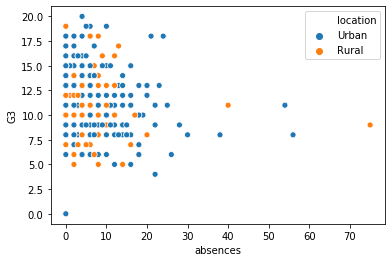

In [5]:
# Create a scatter plot of absences vs. final grade
sns.scatterplot(x="absences", y="G3", 
                data=student_data, 
                hue="location")
# Show plot
plt.show()

How many students live in urban vs. rural areas, and does this vary based on what school the student attends? Let's make a count plot with subgroups to find out.

The "school" column indicates the initials of which school the student attended - either "GP" or "MS".

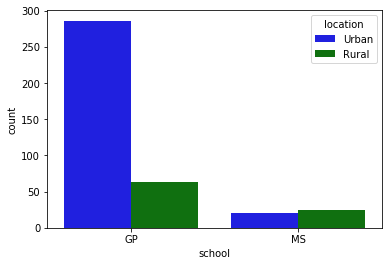

In [6]:
palette_colors = {"Rural": "green", "Urban": "blue"}

# Create a count plot of school with location subgroups
sns.countplot(x="school", data=student_data,
              hue="location",
              palette=palette_colors)

# Display plot
plt.show()

# Creating subplots with col and row
We've seen in prior exercises that students with more absences ("absences") tend to have lower final grades ("G3"). Does this relationship hold regardless of how much time students study each week?

To answer this, we'll look at the relationship between the number of absences that a student has in school and their final grade in the course, creating separate subplots based on each student's weekly study time ("study_time").

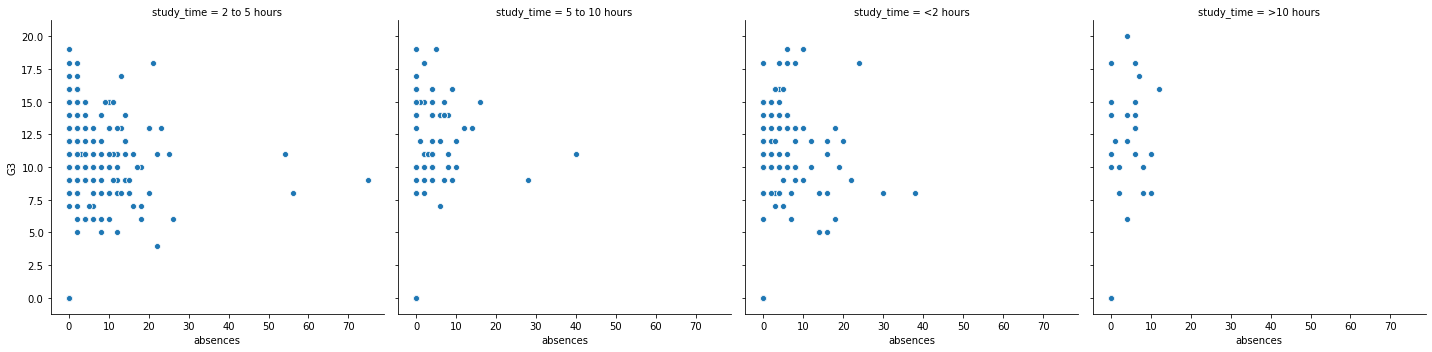

In [7]:
# Change to make subplots based on study time
sns.relplot(x="absences", y="G3", 
            data=student_data,
            kind="scatter",
            col="study_time")

# Show plot
plt.show()

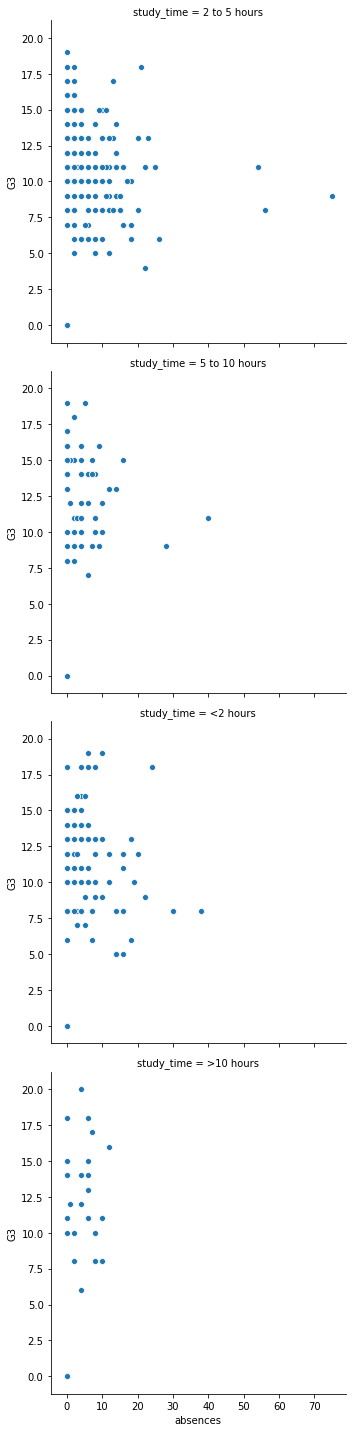

In [8]:
# Change this scatter plot to arrange the plots in rows instead of columns
sns.relplot(x="absences", y="G3", 
            data=student_data,
            kind="scatter", 
            row="study_time")

# Show plot
plt.show()

# Creating two-factor subplots
Let's continue looking at the `student_data` dataset of students in secondary school. Here, we want to answer the following question: does a student's first semester grade ("G1") tend to correlate with their final grade ("G3")?

There are many aspects of a student's life that could result in a higher or lower final grade in the class. For example, some students receive extra educational support from their school ("schoolsup") or from their family ("famsup"), which could result in higher grades. Let's try to control for these two factors by creating subplots based on whether the student received extra educational support from their school or family.

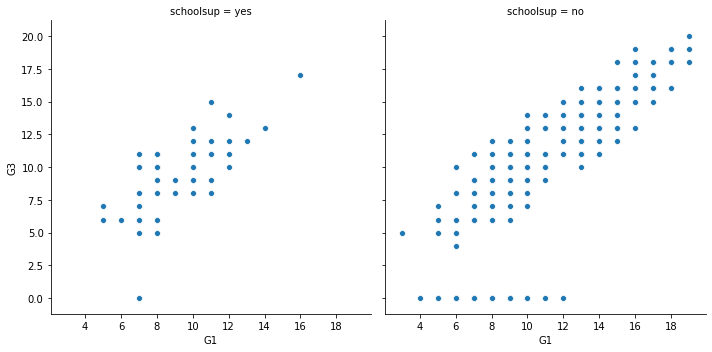

In [9]:
# Adjust to add subplots based on school support
sns.relplot(x="G1", y="G3", 
            data=student_data,
            kind="scatter", 
            col="schoolsup",
            col_order=["yes", "no"])

# Show plot
plt.show()

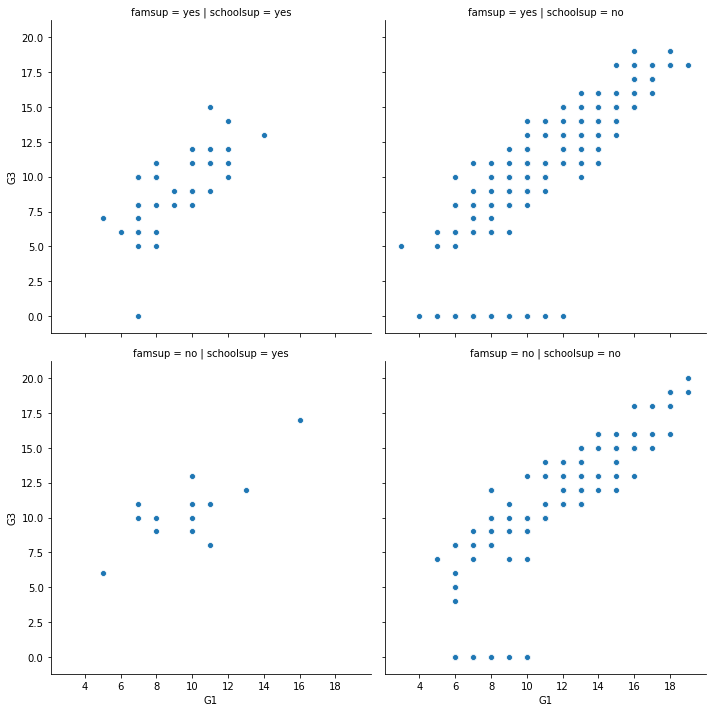

In [10]:
# Adjust further to add subplots based on family support
sns.relplot(x="G1", y="G3", 
            data=student_data,
            kind="scatter", 
            col="schoolsup",
            col_order=["yes", "no"],
            row="famsup",
            row_order=["yes", "no"])

# Show plot
plt.show()

# Customizing

## Changing the size of scatter plot points
In this exercise, we'll explore Seaborn's mpg dataset, which contains one row per car model and includes information such as the year the car was made, the number of miles per gallon ("M.P.G.") it achieves, the power of its engine (measured in "horsepower"), and its country of origin.

What is the relationship between the power of a car's engine ("horsepower") and its fuel efficiency ("mpg")? And how does this relationship vary by the number of cylinders ("cylinders") the car has? Let's find out.

In [12]:
mpg = pd.read_csv('../data/20. Introducción a seaborn/mpg.csv')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


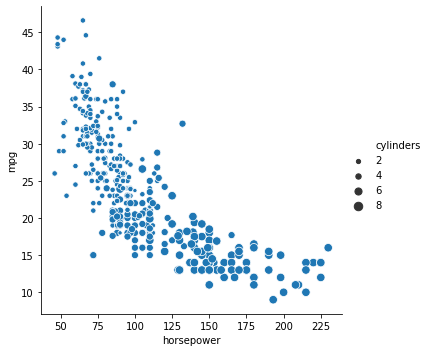

In [13]:
# Create scatter plot of horsepower vs. mpg
sns.relplot(x="horsepower", y="mpg", 
            data=mpg, kind="scatter", 
            size="cylinders")

# Show plot
plt.show()

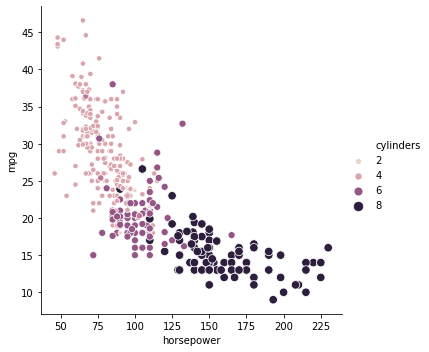

In [14]:
# Create scatter plot of horsepower vs. mpg
sns.relplot(x="horsepower", y="mpg", 
            data=mpg, kind="scatter", 
            size="cylinders", hue="cylinders")

# Show plot
plt.show()

# Changing the style of scatter plot points
Let's continue exploring Seaborn's mpg dataset by looking at the relationship between how fast a car can accelerate ("acceleration") and its fuel efficiency ("mpg"). Do these properties vary by country of origin ("origin")?

Note that the "acceleration" variable is the time to accelerate from 0 to 60 miles per hour, in seconds. Higher values indicate slower acceleration.

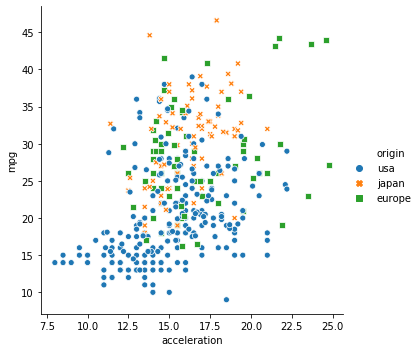

In [15]:
# Create a scatter plot of acceleration vs. mpg
sns.relplot(x="acceleration", y="mpg", 
            data=mpg, kind="scatter", 
            style="origin", hue="origin")

# Show plot
plt.show()

# Interpreting line plots
In this exercise, we'll continue to explore Seaborn's mpg dataset, which contains one row per car model and includes information such as the year the car was made, its fuel efficiency (measured in "miles per gallon" or "M.P.G"), and its country of origin (USA, Europe, or Japan).

How has the average miles per gallon achieved by these cars changed over time? Let's use line plots to find out!

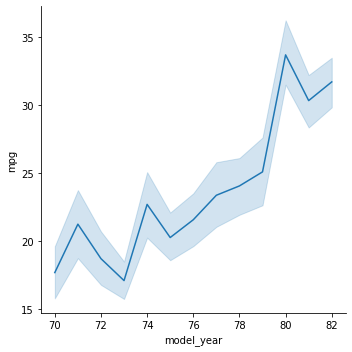

In [16]:
# Create line plot
sns.relplot(x="model_year", y="mpg",
            data=mpg, kind="line") # 95% confidence interval

# Show plot
plt.show()

## Visualizing standard deviation with line plots
In the last exercise, we looked at how the average miles per gallon achieved by cars has changed over time. Now let's use a line plot to visualize how the distribution of miles per gallon has changed over time.

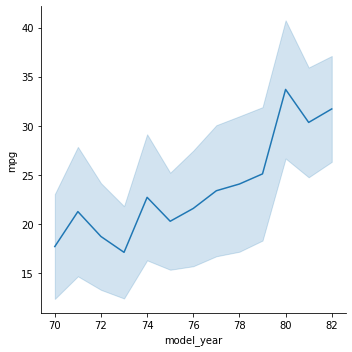

In [17]:
# Make the shaded area show the standard deviation
sns.relplot(x="model_year", y="mpg",
            data=mpg, kind="line",
            ci="sd")

# Show plot
plt.show()

## Plotting subgroups in line plots
Let's continue to look at the mpg dataset. We've seen that the average miles per gallon for cars has increased over time, but how has the average horsepower for cars changed over time? And does this trend differ by country of origin?

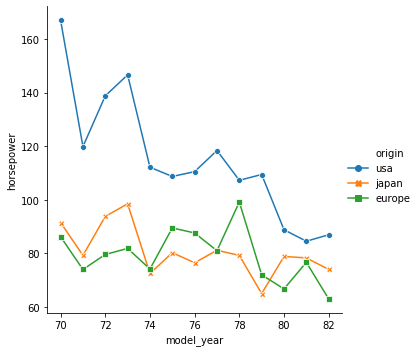

In [21]:
# Add markers and make each line have the same style
sns.relplot(x="model_year", y="horsepower", 
            data=mpg, kind="line", 
            ci=None, style="origin", 
            hue="origin", markers=True,
            dashes=False)

# Show plot
plt.show()

## Count plots
In this exercise, we'll return to exploring our dataset that contains the responses to a survey sent out to young people. We might suspect that young people spend a lot of time on the internet, but how much do they report using the internet each day? Let's use a count plot to break down the number of survey responses in each category and then explore whether it changes based on age.

As a reminder, to create a count plot, we'll use the `catplot()` function and specify the name of the categorical variable to count (`x=_`), the Pandas DataFrame to use (`data=_`), and the type of plot (`kind="count"`).

In [23]:
survey_data = pd.read_csv('../data/20. Introducción a seaborn/young-people-survey-responses.csv')
survey_data.head()

,Unnamed: 0,Music,Techno,Movies,History,Mathematics,Pets,Spiders,Loneliness,Parents' advice,Internet usage,Finances,Age,Siblings,Gender,Village - town
0,0,5.0,1.0,5.0,1.0,3.0,4.0,1.0,3.0,4.0,few hours a day,3.0,20.0,1.0,female,village
1,1,4.0,1.0,5.0,1.0,5.0,5.0,1.0,2.0,2.0,few hours a day,3.0,19.0,2.0,female,city
2,2,5.0,1.0,5.0,1.0,5.0,5.0,1.0,5.0,3.0,few hours a day,2.0,20.0,2.0,female,city
3,3,5.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,2.0,most of the day,2.0,22.0,1.0,female,city
4,4,5.0,2.0,5.0,3.0,2.0,1.0,1.0,3.0,3.0,few hours a day,4.0,20.0,1.0,female,village


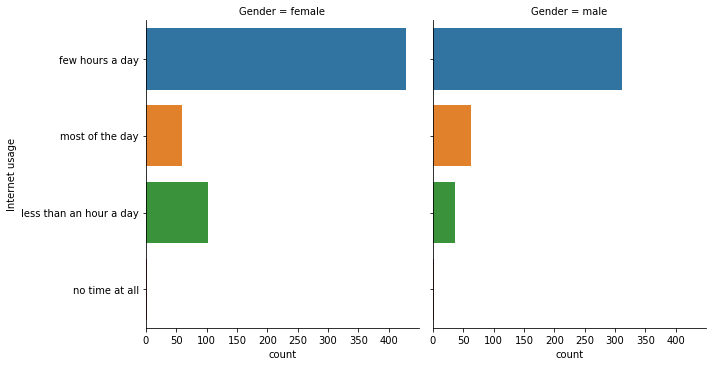

In [25]:
# Create column subplots based on age category
sns.catplot(y="Internet usage", data=survey_data,
            kind="count", col="Gender")

# Show plot
plt.show()

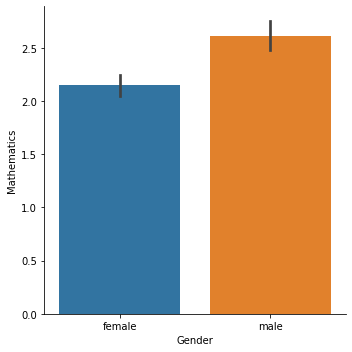

In [28]:
# Create a bar plot of interest in math, separated by gender
sns.catplot(x="Gender", y="Mathematics",
            data=survey_data, kind="bar")

# Show plot
plt.show()

# Customizing bar plots
In this exercise, we'll explore data from students in secondary school. The "study_time" variable records each student's reported weekly study time as one of the following categories: "<2 hours", "2 to 5 hours", "5 to 10 hours", or ">10 hours". Do students who report higher amounts of studying tend to get better final grades? Let's compare the average final grade among students in each category using a bar plot.

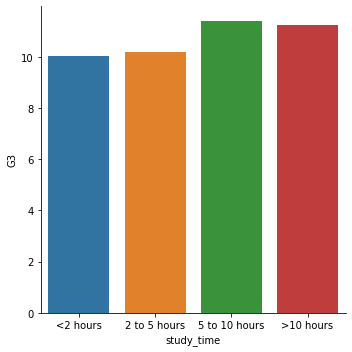

In [29]:
sns.catplot(x="study_time", y="G3",
            data=student_data,
            kind="bar",
            order=["<2 hours", 
                   "2 to 5 hours", 
                   "5 to 10 hours", 
                   ">10 hours"],
            ci=None)

# Show plot
plt.show()

# Create and interpret a box plot
Let's continue using the student_data dataset. In an earlier exercise, we explored the relationship between studying and final grade by using a bar plot to compare the average final grade ("G3") among students in different categories of "study_time".

In this exercise, we'll try using a box plot look at this relationship instead. As a reminder, to create a box plot you'll need to use the `catplot()` function and specify the name of the categorical variable to put on the x-axis (`x=____`), the name of the quantitative variable to summarize on the y-axis (`y=____`), the Pandas DataFrame to use (`data=____`), and the type of plot (`kind="box"`).

<img src="../images/boxplot.jpg">

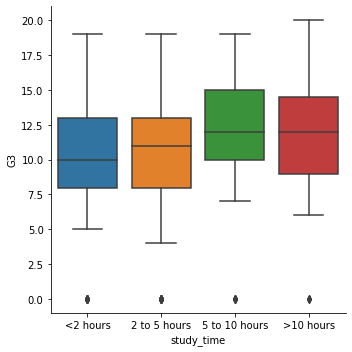

In [30]:
# Specify the category ordering
study_time_order = ["<2 hours", "2 to 5 hours", 
                    "5 to 10 hours", ">10 hours"]

# Create a box plot and set the order of the categories
sns.catplot(x="study_time", y="G3",
            data=student_data,
            kind="box",
            order=study_time_order)

# Show plot
plt.show()

# Using a customs
So far, we've looked at several things in the dataset of survey responses from young people, including their internet usage, how often they listen to their parents, and how many of them report feeling lonely. However, one thing we haven't done is a basic summary of the type of people answering this survey, including their age and gender. Providing these basic summaries is always a good practice when dealing with an unfamiliar dataset.

The code provided will create a box plot showing the distribution of ages for male versus female respondents. Let's adjust the code to customize the appearance, this time using a custom color palette.

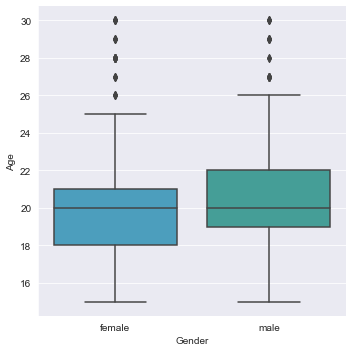

In [32]:
# Set the style to "darkgrid"
sns.set_style("darkgrid")

# Set a custom color palette
sns.set_palette(["#39A7D0", "#36ADA4"])

# Create the box plot of age distribution by gender
sns.catplot(x="Gender", y="Age", 
            data=survey_data, kind="box")

# Show plot
plt.show()

# Adding a title to a FacetGrid object
In the previous exercise, we used `relplot()` with the miles per gallon dataset to create a scatter plot showing the relationship between a car's weight and its horsepower. This created a FacetGrid object. Now that we know what type of object it is, let's add a title to this plot.

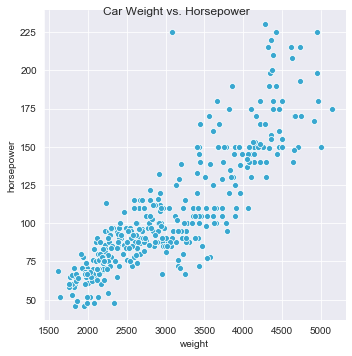

In [39]:
# Create scatter plot
g = sns.relplot(x="weight", 
                y="horsepower", 
                data=mpg,
                kind="scatter")

# Add a title "Car Weight vs. Horsepower"
g.fig.suptitle("Car Weight vs. Horsepower")

# Show plot
plt.show()

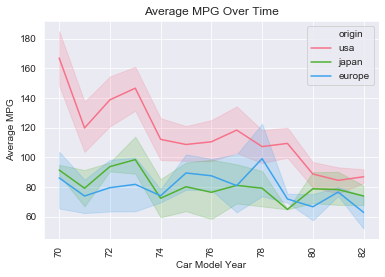

In [43]:
# Add markers and make each line have the same style
g = sns.lineplot(x="model_year", y="horsepower", 
            data=mpg, 
            hue="origin")

# Add a title "Average MPG Over Time"
g.set_title("Average MPG Over Time")

# Add x-axis and y-axis labels
g.set(xlabel="Car Model Year", 
      ylabel="Average MPG")

# Show plot
plt.xticks(rotation=90)
plt.show()

# Final examples

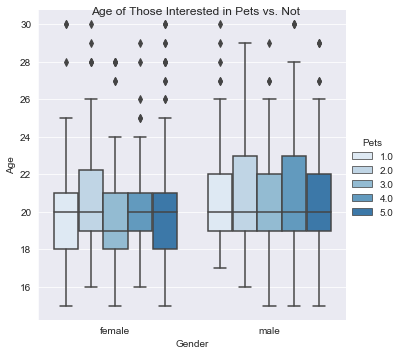

In [46]:
# Set palette to "Blues"
sns.set_palette("Blues")

# Adjust to add subgroups based on "Interested in Pets"
g = sns.catplot(x="Gender",
                y="Age", data=survey_data, 
                kind="box", hue="Pets")

# Set title to "Age of Those Interested in Pets vs. Not"
g.fig.suptitle("Age of Those Interested in Pets vs. Not")

# Show plot
plt.show()

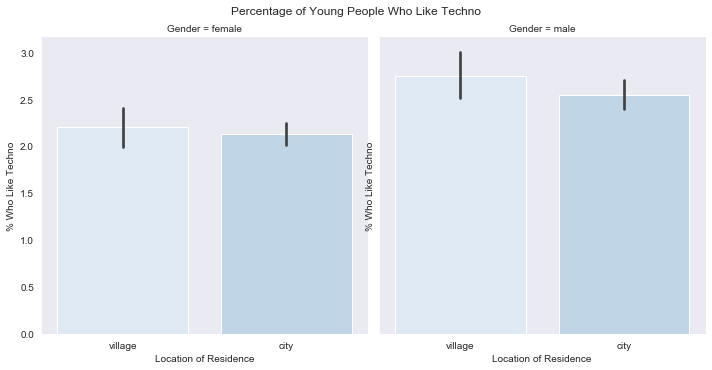

In [48]:
# Set the figure style to "dark"
sns.set_style("dark")

# Adjust to add subplots per gender
g = sns.catplot(x="Village - town", y="Techno", 
                data=survey_data, kind="bar",
                col="Gender")

# Add title and axis labels
g.fig.suptitle("Percentage of Young People Who Like Techno", y=1.02)
g.set(xlabel="Location of Residence", 
      ylabel="% Who Like Techno")

# Show plot
plt.show()